In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
path='/Users/Soheil/Documents/G/ML/autos.csv'
data = pd.read_csv(path, sep=',',encoding='Latin1')
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [15]:
work_data=data.drop('nrOfPictures',1)
print(data.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [16]:
work_data = work_data[work_data.seller != 'gewerblich']
work_data=work_data.drop('seller',1)
print(work_data.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


In [17]:
work_data = work_data[work_data.offerType != 'Gesuch']
work_data=work_data.drop('offerType',1)
#inspecting: name
print(len(work_data.groupby('name').size()), 'different names for all offers')

233517 different names for all offers


In [18]:
work_data=work_data.drop('name',1)
work_data=work_data.drop('abtest',1)

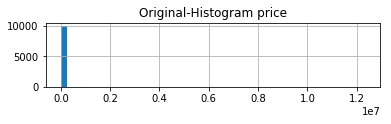

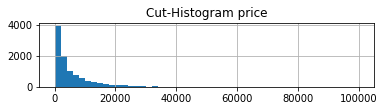

10772 cars with price 0


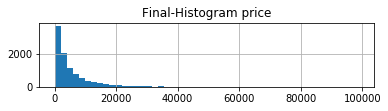

In [19]:
sample_data=work_data.sample(n=10000, random_state=1)
#inspecting: price
plt.subplot(3,1,1)
sample_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value I guess.

#I'll' cut the price at 100000
work_data = work_data[work_data.price < 100000]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()



print(len(work_data[work_data.price == 0]), 'cars with price 0')
work_data = work_data[work_data.price != 0]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [20]:
work_data = work_data[(work_data.yearOfRegistration >= 1863) & (work_data.yearOfRegistration <= 2017)]
print(work_data['powerPS'].describe())

count    356355.000000
mean        116.572558
std         186.866013
min           0.000000
25%          73.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [21]:
#remove data with engine power > 1000
work_data = work_data[(work_data.powerPS > 0) & (work_data.powerPS < 1000)]

count    320213.000000
mean        126.058011
std          62.167403
min           1.000000
25%          80.000000
50%         116.000000
75%         150.000000
max         999.000000
Name: powerPS, dtype: float64


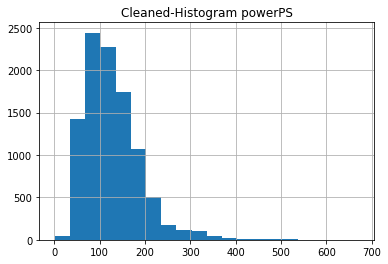

In [22]:
cleaned_data = work_data
column_name_you_want_to_inspect='powerPS'
print(cleaned_data[column_name_you_want_to_inspect].describe())

sample_data=cleaned_data.sample(n=10000, random_state=1)
sample_data[column_name_you_want_to_inspect].hist(bins=20)
plt.title('Cleaned-Histogram ' + column_name_you_want_to_inspect)
plt.show()

In [23]:
#Drop NA 
superclean_data = cleaned_data.dropna()
superclean_data.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


In [24]:
print(superclean_data.describe())

               price  yearOfRegistration        powerPS      kilometer  \
count  247879.000000       247879.000000  247879.000000  247879.000000   
mean     6787.946672         2003.493132     129.290077  123733.716854   
std      8030.154266            6.408262      62.041502   39854.996502   
min         1.000000         1910.000000       1.000000    5000.000000   
25%      1690.000000         2000.000000      86.000000  100000.000000   
50%      3999.000000         2004.000000     116.000000  150000.000000   
75%      8900.000000         2008.000000     158.000000  150000.000000   
max     99999.000000         2017.000000     999.000000  150000.000000   

       monthOfRegistration     postalCode  
count        247879.000000  247879.000000  
mean              6.222044   52133.397863  
std               3.445860   25822.211024  
min               0.000000    1067.000000  
25%               3.000000   31582.000000  
50%               6.000000   51465.000000  
75%               9.00000

### Create numerical feature of how old the car is

In [25]:
pd.options.mode.chained_assignment = None  # default='warn'
import math
superclean_data['date_crawled']= pd.to_datetime(superclean_data['dateCrawled'])
superclean_data['year_registered'] = superclean_data['yearOfRegistration'].apply(lambda x: str(x))
superclean_data['month_registered'] = superclean_data['monthOfRegistration'].apply(lambda x: str(x))
superclean_data['date_crawled_year']= superclean_data['dateCrawled'].apply(lambda x: int(x.split('-')[0]))

superclean_data['yearsOld'] =  superclean_data['date_crawled_year'] - superclean_data['yearOfRegistration'] ;
#superclean_data['registration'] = superclean_data['year_registered'] +"-" + superclean_data['month_registered'] + "-01"

### Create the label based on price 8000 euros. If price is less than 8000 mark it has less expensive

In [26]:
superclean_data['less_expensive']  = superclean_data['price'].apply(lambda x: 1 if (x <= 8000)  else 0)

### Creating categorical variables using One-hot-encoding

In [27]:
superclean_data['gearbox_category'] = superclean_data['gearbox'].apply(lambda x: 0 if (x == 'manuell') else 1)
data = superclean_data;
# there are 7 unique fuel types, we can create a categorical variable for each one of them
#array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
data['benzin'] = data['fuelType'].apply(lambda x : 1 if (x == 'benzin') else 0)
data['diesel'] = data['fuelType'].apply(lambda x : 1 if (x == 'diesel') else 0)
data['lpg'] = data['fuelType'].apply(lambda x : 1 if (x == 'lpg') else 0)
data['andere'] = data['fuelType'].apply(lambda x : 1 if (x == 'andere') else 0)
data['hybrid'] = data['fuelType'].apply(lambda x : 1 if (x == 'hybrid') else 0)
data['cng'] = data['fuelType'].apply(lambda x : 1 if (x == 'cng') else 0)
data['elektro'] = data['fuelType'].apply(lambda x : 1 if (x == 'elektro') else 0)

In [28]:
# there are 8 unique vehicle types. We can create a categorical variable for each one of them
data['kleinwagen'] = data['vehicleType'].apply(lambda x : 1 if (x == 'kleinwagen') else 0)
data['cabrio'] = data['vehicleType'].apply(lambda x : 1 if (x == 'cabrio') else 0)
data['limousine'] = data['vehicleType'].apply(lambda x : 1 if (x == 'limousine') else 0)
data['kombi'] = data['vehicleType'].apply(lambda x : 1 if (x == 'kombi') else 0)
data['suv'] = data['vehicleType'].apply(lambda x : 1 if (x == 'suv') else 0)
data['bus'] = data['vehicleType'].apply(lambda x : 1 if (x == 'bus') else 0)
data['coupe'] = data['vehicleType'].apply(lambda x : 1 if (x == 'coupe') else 0)

In [29]:
# there are 35+ models, we take top models only
data['golf'] = data['model'].apply(lambda x : 1 if (x == 'golf') else 0)
data['fabia'] = data['model'].apply(lambda x : 1 if (x == 'fabia') else 0)
data['3er'] = data['model'].apply(lambda x : 1 if (x == '3er') else 0)
data['polo'] = data['model'].apply(lambda x : 1 if (x == 'polo') else 0)
data['corsa'] = data['model'].apply(lambda x : 1 if (x == 'corsa') else 0)
data['a4'] = data['model'].apply(lambda x : 1 if (x == 'a4') else 0)
data['passat'] = data['model'].apply(lambda x : 1 if (x == 'passat') else 0)
data['astra'] = data['model'].apply(lambda x : 1 if (x == 'astra') else 0)
data['5er'] = data['model'].apply(lambda x : 1 if (x == '5er') else 0)
data['c_klasse'] = data['model'].apply(lambda x : 1 if (x == 'c_klasse') else 0)

In [30]:
data['volkswagen'] = data['brand'].apply(lambda x : 1 if (x == 'volkswagen') else 0)
data['bmw'] = data['brand'].apply(lambda x : 1 if (x == 'bmw') else 0)
data['mercedes_benz'] = data['brand'].apply(lambda x : 1 if (x == 'mercedes_benz') else 0)
data['skoda'] = data['brand'].apply(lambda x : 1 if (x == 'skoda') else 0)

data['opel'] = data['brand'].apply(lambda x : 1 if (x == 'opel') else 0)
data['audi'] = data['brand'].apply(lambda x : 1 if (x == 'audi') else 0)

data['ford'] = data['brand'].apply(lambda x : 1 if (x == 'ford') else 0)
data['renault'] = data['brand'].apply(lambda x : 1 if (x == 'renault') else 0)
data['porsche'] = data['brand'].apply(lambda x : 1 if (x == 'porsche') else 0)
data['jaguar'] = data['brand'].apply(lambda x : 1 if (x == 'jaguar') else 0)


data['repaired'] = data['notRepairedDamage'].apply(lambda x : 0 if (x=='nein') else 1)
data['peugeot'] = data['brand'].apply(lambda x : 1 if (x == 'peugeot') else 0)
data['fiat'] = data['brand'].apply(lambda x : 1 if (x == 'fiat') else 0)
data['seat'] = data['brand'].apply(lambda x : 1 if (x == 'seat') else 0)
data['toyota'] = data['brand'].apply(lambda x : 1 if (x == 'toyota') else 0)
data['nissan'] = data['brand'].apply(lambda x : 1 if (x == 'nissan') else 0)
data['kia'] = data['brand'].apply(lambda x : 1 if (x == 'kia') else 0)

In [31]:
data['oldandheavilyUsed'] = data['yearsOld'] * data['kilometer']

data['oldandheavilyUsedAndDamaged'] = data['yearsOld'] * data['kilometer'] * data['repaired']


### Feature scaling or feature normalization
##### Feature scaling is not needed for decision tree, but it is recommended in many references

In [32]:
#feature scaling 

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['less_expensive']
Y = data[label_field]
training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']
training_fields = ['less_expensive','oldandheavilyUsedAndDamaged','peugeot', 'kia','fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed','powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg","andere","hybrid","cng","elektro","kleinwagen","cabrio","limousine","kombi","suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra","5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired"]
#training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']

X = data[training_fields]
scaled_X = scaler.fit_transform(X)
Y_label = scaler.fit_transform(Y)
Y_label = pd.DataFrame(Y_label, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
data.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,jaguar,repaired,peugeot,fiat,seat,toyota,nissan,kia,oldandheavilyUsed,oldandheavilyUsedAndDamaged
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,...,0,0,0,0,0,0,0,0,2250000,0
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,...,0,0,0,0,0,0,0,0,720000,0
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,...,0,1,0,0,0,0,0,0,3150000,3150000
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,...,0,0,1,0,0,0,0,0,1800000,0
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,...,0,0,0,0,0,0,0,0,1800000,0


In [33]:
Y = scaled_X.less_expensive;
X_all= scaled_X[training_fields[1:]]
training_fields[1:]
len(training_fields[1:])

47

## Decision Tree with criterion as gini index

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

## Visualization of the Decision Tree with criterion as gini index

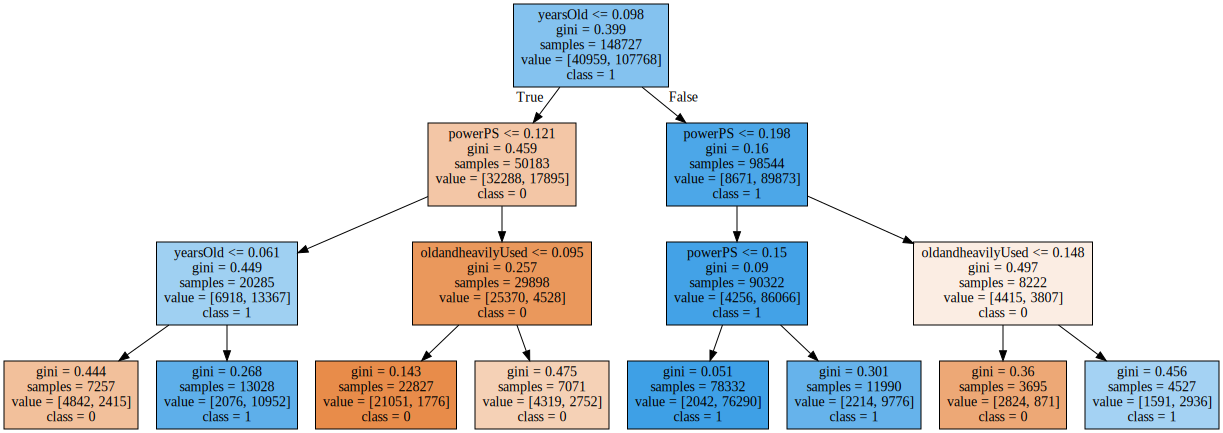

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# class labels
labels = training_fields[1:]

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [37]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 1., 1.])

In [38]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  89.254881394223


In [39]:
predictions = clf_gini.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 66227.0
False positives: 5310.0
True Negatives: 22273.0
False Negatives: 5346.0
precision: 0.9257726770761984
recall: 0.9253070291869839
f1score: 0.9255397945636225


## Decision Tree with criterion as information gain

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

## Visualization of the Decision Tree with criterion as information gain

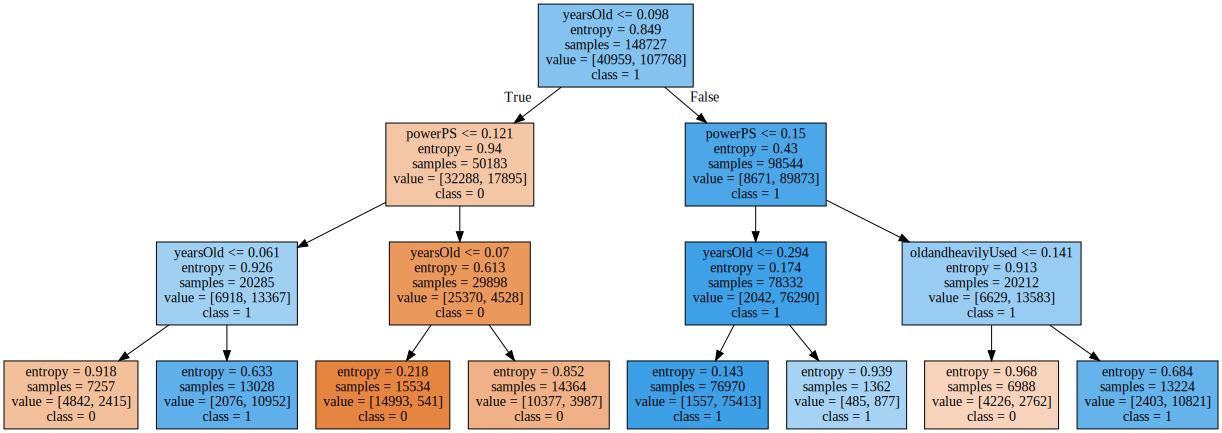

In [41]:
# class labels
labels = training_fields[1:]

graph = Source(tree.export_graphviz(clf_entropy, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [44]:
y_pred = clf_entropy.predict(X_test)
y_pred
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  88.85549459415847


In [45]:
predictions = clf_entropy.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 64909.0
False positives: 4388.0
True Negatives: 23195.0
False Negatives: 6664.0
precision: 0.9366783554843644
recall: 0.9068922638425104
f1score: 0.9215446865904735
